<a href="https://colab.research.google.com/github/addaia/TechnicalProject/blob/main/plotposter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scienceplots


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import scienceplots
plt.style.use('science')

# parameters for the science style -- too many
plt.style.use(['science','no-latex'])
plt.rcParams.update({
    "font.size": 21,
    "axes.labelsize": 21,
    "legend.fontsize": 21,
    "xtick.labelsize": 21,
    "ytick.labelsize": 21,
    "axes.linewidth": 1,
    "axes.edgecolor": "black",
    "legend.fancybox": True,
    "legend.frameon": True,
    "legend.edgecolor": "black",
    "axes.facecolor": "white",
    "axes.grid": True,
    "grid.color": "#b7b7b7",
    "grid.linestyle": "-",
    "grid.linewidth": 0.5,
})

In [6]:
# ML
models_ML = ['LR', 'RF', 'SVM']
accuracies_ML = [0.029613*100, 0.034169*100, 0.030372*100]

# distilgpt2
models_small = ['distilgpt2', '+SFT', '+SFT+CoT', '+SFT+CoT+CE']
accuracies_small = [3.05, 1.95, 3.82, 11.45]

# large LLM
models_large = ['Qwen-72B-Chat', 'internlm2-chat-1.8b-sft', 'deepseek-llm-7b-chat']
accuracies_large = [77.79, 36.69, 61.03]
sizes_large = [72, 1.8, 7]


<ipython-input-9-6f9bf85fd572>:58: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.97])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

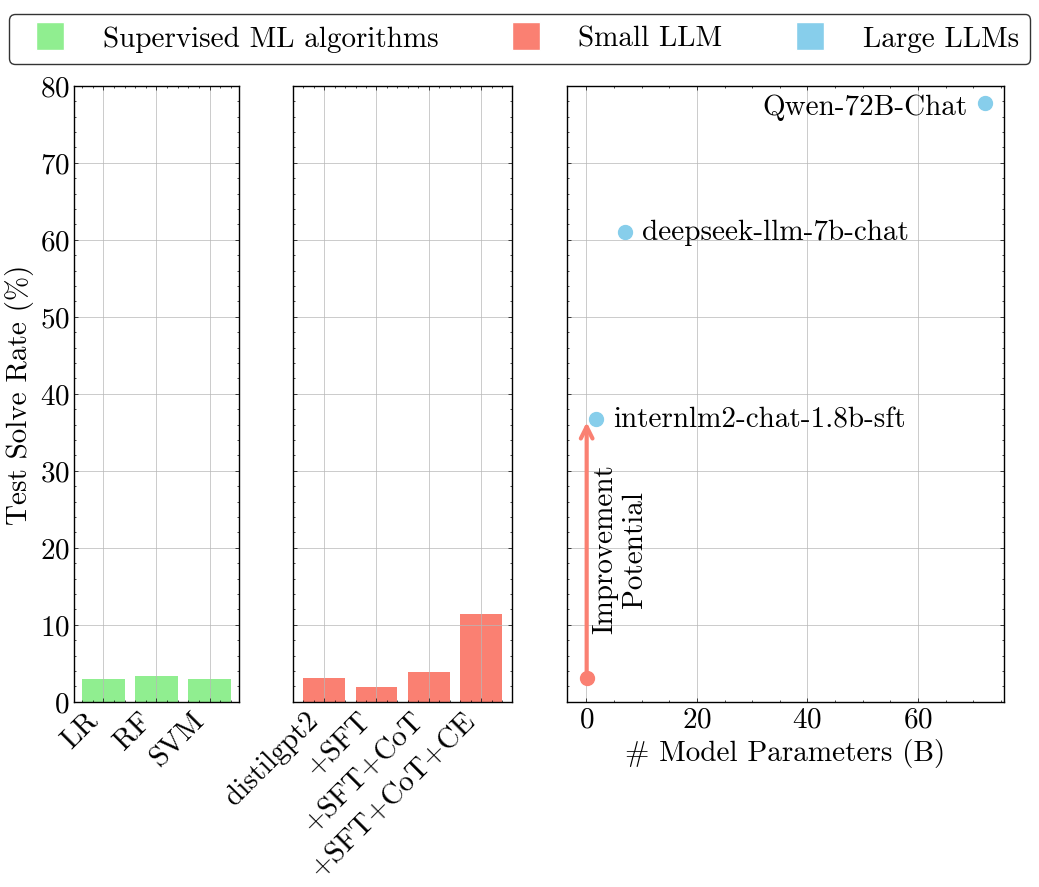

In [9]:

# plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12, 8),
                                    gridspec_kw={'width_ratios': [3, 4, 8]}) # make plast plot clearer

# p1
x_ML = np.arange(len(models_ML))
bars_ML = ax1.bar(x_ML, accuracies_ML, color='lightgreen')
ax1.set_xticks(x_ML)
ax1.set_xticklabels(models_ML, rotation=45, ha='right')
# same for all
ax1.set_ylabel("Test Solve Rate (%)")
ax1.set_ylim(0, 80)


# p2
x_small = np.arange(len(models_small))
bars_small = ax2.bar(x_small, accuracies_small, color='salmon')
ax2.set_xticks(x_small)
ax2.set_xticklabels(models_small, rotation=45, ha='right')

# p3
scatter_large = ax3.scatter(sizes_large, accuracies_large, color='skyblue', s=100)
ax3.set_xlabel("# Model Parameters (B)")

# make text preety and readible
ax3.text(10, 60.03, "deepseek-llm-7b-chat", ha='left')
ax3.text(4.8, 35.69, "internlm2-chat-1.8b-sft", ha='left')
ax3.text(69, 76.3, "Qwen-72B-Chat", ha='right')

## arrow and small LLM sizing relative to larger LLMS
base_small = 3.05
lowest_large = min(accuracies_large)
best_small_size = 0.082   #  82M parameters or 0.082B

# plot point
ax3.scatter(best_small_size, base_small, color='salmon', s=100, zorder=3)

# arrow
ax3.annotate("",
             xy=(best_small_size, lowest_large),
             xytext=(best_small_size, base_small),
             arrowprops=dict(arrowstyle='->', color='salmon', lw=3))

# label arrow
midpoint_y = (lowest_large + base_small) / 2
ax3.text(best_small_size + 0.5, midpoint_y,
         "\n\nImprovement\nPotential",
         color='black', rotation=90, va='center', ha='center')

# legen
legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='Supervised ML algorithms', markerfacecolor='lightgreen', markersize=20),
    Line2D([0], [0], marker='s', color='w', label='Small LLM', markerfacecolor='salmon', markersize=20),
    Line2D([0], [0], marker='s', color='w', label='Large LLMs', markerfacecolor='skyblue', markersize=20)
]
fig.legend(handles=legend_elements, loc='upper center', ncol=3)

plt.tight_layout(rect=[1, 0, 1, 0.97])

plt.savefig('ppp.pdf')
from google.colab import files
files.download('ppp.pdf')
plt.show()

